# Python for Data Analysis - part4

##### Python의 numpy, pandas 등을 정리하였으며 파이썬 라이브러리를 활용한 데이터분석(2판)을 참고하여 작성하였습니다.
##### 해당 자료는 python 3.6 기반으로 작성되었습니다.

## 4. Numpy 기본 : 배열과 벡터 연산
#### - Numpy는 파이썬에서 산술 계산을 위한 가장 중요한 필수 패키지 중 하나이다. 
#### - Numpy는 대용량 데이터 배열을 효율적으로 다룰 수 있게 설계되었다. 
#### - Numpy는 내부적으로 데이터를 다른 내장 파이썬 객체와 구분된 연속된 메모리 블록에 저장한다. 각종 알고리즘은 모두 C로 작성되어 타입 검사나 다른 오버헤드 없이 메모리를 직접 조작할 수 있다. 또한 내장 파이썬의 연속형 자료형들보다 훨씬 더 적은 메모리를 사용한다. 
#### - Numpy 연산은 파이썬 반복문을 사용하지 않고 전체 배열에 대한 복잡한 계산을 수행할 수 있다. 

In [20]:
# numpy 사용 코드가 순수 파이썬 작성 코드보다 열 배에서 백 배 이상 빠르고 메모리를 적게 사용
import numpy as np 

my_arr = np.arange(1000000)
my_list = list(range(1000000))

%time for _ in range(10) : my_arr2 = my_arr * 2
%time for _ in range(10) : my_list2 = [x *2 for x in my_list]

CPU times: user 11.1 ms, sys: 18.2 ms, total: 29.4 ms
Wall time: 30.6 ms
CPU times: user 428 ms, sys: 89.2 ms, total: 517 ms
Wall time: 518 ms


### 4.1 Numpy ndarray : 다차원 배열 객체
#### - ndarray는 모두 동일한 자료형의 원소를 필요로 한다.

In [21]:
import numpy as np 

# 임의의 값 생성
data = np.random.randn(2,3)
print(data)
print("--------------------------------")
print(data * 10)
print("--------------------------------")
print(data + data)
print("--------------------------------")

# shape - 배열의 각 차원 크기 출력
print(data.shape)
print("--------------------------------")

# dtype - 배열의 자료형 출력
print(data.dtype)
print("--------------------------------")

[[ 0.48989542  1.27209872  1.21794954]
 [ 0.05890194  1.07067812 -0.32811885]]
--------------------------------
[[ 4.8989542  12.72098725 12.17949541]
 [ 0.58901942 10.70678118 -3.28118854]]
--------------------------------
[[ 0.97979084  2.54419745  2.43589908]
 [ 0.11780388  2.14135624 -0.65623771]]
--------------------------------
(2, 3)
--------------------------------
float64
--------------------------------


#### 4.1.1 ndarray 생성하기 

In [22]:
data1 = [6, 7.5, 8, 0, 1]
arr1 = np.array(data1)
print(arr1)
print("--------------------------------")

data2 = [[1,2,3,4], [5,6,7,8]]
arr2 = np.array(data2)
print(arr2)
print("--------------------------------")

# ndim - ndarray의 차원 수 출력
print(arr2.ndim)
print("--------------------------------")
print(arr2.shape)
print("--------------------------------")

[6.  7.5 8.  0.  1. ]
--------------------------------
[[1 2 3 4]
 [5 6 7 8]]
--------------------------------
2
--------------------------------
(2, 4)
--------------------------------


In [23]:
# np.zeros() / np.ones() - 주어진 기리나 모양에 0으로 / 1으로 채워진 ndarray 생성
print(np.zeros(10))
print("--------------------------------")
print(np.ones((3,6)))
print("--------------------------------")

# np.empty() - 초기화 되지 않은 배열 생성 : 가비지 값으로 채워진 배열을 반환
print(np.empty((2,3,2)))
print("--------------------------------")

# np.arange() - 파이썬의 range 함수의 배열 버전
print(np.arange(10))
print("--------------------------------")

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
--------------------------------
[[1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]]
--------------------------------
[[[-2.31584178e+077 -2.31584178e+077]
  [ 5.92878775e-323  0.00000000e+000]
  [ 0.00000000e+000  0.00000000e+000]]

 [[ 0.00000000e+000  0.00000000e+000]
  [ 0.00000000e+000  0.00000000e+000]
  [ 0.00000000e+000  0.00000000e+000]]]
--------------------------------
[0 1 2 3 4 5 6 7 8 9]
--------------------------------


#### - array : 입력 데이터를 ndarray로 변환, 자료형 입력하지 않으면 자료형을 추론하여 저장
#### - asarray : 입력 데이터를 ndarray로 변환하지만 이미 ndarray일 경우 복사가 일어나지 않는다
#### - ones_like, zeros_like, empty_like : 주어진 배열과 동일한 모양과 dtype을 가지는 배열을 생성하여 모두 1로 초기화 / 0으로 초기화 / 초기화 하지 않음 
#### - full, full_like : 인자로 받은 dtype과 배열의 모양을 가지는 배열을 생성하고 인자로 받은 값으로 배열을 채움
#### - eye, identity : N * N 크기의 단위행렬을 생성

#### 4.1.2 ndarray의 dtype

In [24]:
arr1 = np.array([1,2,3], dtype = np.float64)
arr2 = np.array([1,2,3], dtype = np.int32)

print(arr1.dtype)
print("--------------------------------")
print(arr2.dtype)
print("--------------------------------")

float64
--------------------------------
int32
--------------------------------


In [25]:
# astype - 배열의 dtype을 다른 형으로 명시적으로 변환
arr = np.array([1,2,3,4,5])
print(arr.dtype)
print("--------------------------------")
float_arr = arr.astype(np.float64)
print(float_arr.dtype)
print("--------------------------------")

arr2 = np.array([1.2,3.123,-2.1])
print(arr2.dtype)
print("--------------------------------")
int_arr2 = arr2.astype(np.int32)
print(int_arr2)
print("--------------------------------")

numeric_string = np.array(['1.23', '-9.2', '42'], dtype = np.string_)
print(numeric_string.astype(np.float64))
print("--------------------------------")

int64
--------------------------------
float64
--------------------------------
float64
--------------------------------
[ 1  3 -2]
--------------------------------
[ 1.23 -9.2  42.  ]
--------------------------------


#### 4.1.3 Numpy 배열의 산술 연산
#### - 벡터화 : for문을 작성하지 않고 데이터를 일괄 처리 / 같은 크기의 배열 간의 산술 연산은 배열의 각 원소 단위로 적용

In [27]:
arr = np.array([[1.,2.,3.], [4.,5.,6.]])
print(arr)
print("--------------------------------")

print(arr * arr)
print("--------------------------------")

print(arr - arr)
print("--------------------------------")

print(1 / arr)
print("--------------------------------")

print(arr ** 0.5)
print("--------------------------------")

arr2 = np.array([[0., 4., 1.], [7., 2., 12.]])
print(arr2)
print("--------------------------------")

print(arr2 > arr)
print("--------------------------------")

[[1. 2. 3.]
 [4. 5. 6.]]
--------------------------------
[[ 1.  4.  9.]
 [16. 25. 36.]]
--------------------------------
[[0. 0. 0.]
 [0. 0. 0.]]
--------------------------------
[[1.         0.5        0.33333333]
 [0.25       0.2        0.16666667]]
--------------------------------
[[1.         1.41421356 1.73205081]
 [2.         2.23606798 2.44948974]]
--------------------------------
[[ 0.  4.  1.]
 [ 7.  2. 12.]]
--------------------------------
[[False  True False]
 [ True False  True]]
--------------------------------


#### - 브로드캐스팅 : 크기가 다른 배열 간의 연산 

#### 4.1.4 색인과 슬라이싱 기초

In [31]:
arr = np.arange(10)

print(arr)
print("--------------------------------")

print(arr[5])
print("--------------------------------")

print(arr[5:8])
print("--------------------------------")

arr[5:8] = 12
print(arr)
print("--------------------------------")

# 배열 조각은 원본 배열의 뷰 - 데이터는 복사되지 않고 뷰에 대한 변경은 그대로 원본 배열에 반영
arr_slice = arr[5:8]
print(arr_slice)
print("--------------------------------")

arr_slice[1] = 12345
print(arr)
print("--------------------------------")

# copy 메서드 - 뷰 대신 ndarray 슬라이스의 복사본을 얻을 때 사용
arr_copy = arr[1:3].copy()
print(arr_copy)
print("--------------------------------")

arr_copy[0] = 34
print(arr)
print("--------------------------------")

[0 1 2 3 4 5 6 7 8 9]
--------------------------------
5
--------------------------------
[5 6 7]
--------------------------------
[ 0  1  2  3  4 12 12 12  8  9]
--------------------------------
[12 12 12]
--------------------------------
[    0     1     2     3     4    12 12345    12     8     9]
--------------------------------
[1 2]
--------------------------------
[    0     1     2     3     4    12 12345    12     8     9]
--------------------------------


In [32]:
arr2d = np.array([[1,2,3], [4,5,6], [7,8,9]])
print(arr2d[2])
print("--------------------------------")

print(arr2d[0][2])
print("--------------------------------")
print(arr2d[0,2])
print("--------------------------------")

[7 8 9]
--------------------------------
3
--------------------------------
3
--------------------------------


#### - 다차원 배열의 마지막 색인을 생략하면 반환되는 객체는 상위 차원의 데이터를 포함하고 있는 한 차원 낮은 ndarray

In [38]:
arr3d = np.array([[[1,2,3], [4,5,6]], [[7,8,9], [10,11,12]]])
print(arr3d)
print("--------------------------------")

print(arr3d[0])
print("--------------------------------")

old_values = arr3d[0].copy()
arr3d[0] = 42

print(arr3d)
print("--------------------------------")

arr3d[0] = old_values
print(arr3d)
print("--------------------------------")

print(arr3d[1,0])
print("--------------------------------")

x = arr3d[1]
print(x)
print("--------------------------------")
print(x[0])
print("--------------------------------")

[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]]
--------------------------------
[[1 2 3]
 [4 5 6]]
--------------------------------
[[[42 42 42]
  [42 42 42]]

 [[ 7  8  9]
  [10 11 12]]]
--------------------------------
[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]]
--------------------------------
[7 8 9]
--------------------------------
[[ 7  8  9]
 [10 11 12]]
--------------------------------
[7 8 9]
--------------------------------


In [42]:
arr = np.array([0,1,2,3,4,64,64,8,9])
print(arr[1:6])
print("--------------------------------")

print(arr2d[:2])
print("--------------------------------")

print(arr2d[:2, 1:])
print("--------------------------------")

print(arr2d[1, :2])
print("--------------------------------")

print(arr2d[:2, 2])
print("--------------------------------")

print(arr2d[:, :1])
print("--------------------------------")

[ 1  2  3  4 64]
--------------------------------
[[1 2 3]
 [4 5 6]]
--------------------------------
[[2 3]
 [5 6]]
--------------------------------
[4 5]
--------------------------------
[3 6]
--------------------------------
[[1]
 [4]
 [7]]
--------------------------------


#### 4.1.5 불리언값으로 선택하기

In [53]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
data = np.random.randn(7,4)

print(names)
print("--------------------------------")

print(data)
print("--------------------------------")

print(names == 'Bob')
print("--------------------------------")

print(data[names == 'Bob'])
print("--------------------------------")

print(data[names == 'Bob', 2:])
print("--------------------------------")

print(data[names == 'Bob', 3])
print("--------------------------------")

print(data[names != 'Bob'])
print("--------------------------------")

# 파이썬 예약어인 and와 or는 배열에서 사용할 수 없다.
mask = (names == 'Bob') | (names == 'Will')
print(mask)
print("--------------------------------")

data[data <0] = 0
print(data)
print("--------------------------------")

data[names!='Joe'] = 7
print(data)
print("--------------------------------")

['Bob' 'Joe' 'Will' 'Bob' 'Will' 'Joe' 'Joe']
--------------------------------
[[-1.37482695 -1.04162447  0.15862974  0.5985341 ]
 [ 0.49385714  1.47484816 -0.66006392 -1.23195722]
 [-0.16213556 -0.32878372  0.68723083 -0.98895393]
 [ 0.26383172 -0.26977137 -0.28745953  0.10086333]
 [-1.00585968 -1.48705047  0.95226657  0.93294219]
 [-0.80518306  0.62712864  1.68172793 -0.52480927]
 [-0.64892237 -0.17858963 -0.16560057  0.86108616]]
--------------------------------
[ True False False  True False False False]
--------------------------------
[[-1.37482695 -1.04162447  0.15862974  0.5985341 ]
 [ 0.26383172 -0.26977137 -0.28745953  0.10086333]]
--------------------------------
[[ 0.15862974  0.5985341 ]
 [-0.28745953  0.10086333]]
--------------------------------
[0.5985341  0.10086333]
--------------------------------
[[ 0.49385714  1.47484816 -0.66006392 -1.23195722]
 [-0.16213556 -0.32878372  0.68723083 -0.98895393]
 [-1.00585968 -1.48705047  0.95226657  0.93294219]
 [-0.80518306  0.62

#### 4.1.6 팬시 색인

In [56]:
arr = np.empty((8,4))

for i in range(8):
    arr[i] = i
    
print(arr)
print("--------------------------------")

print(arr[[4,3,0,6]])
print("--------------------------------")

print(arr[[-3,-5,-7]])
print("--------------------------------")

[[0. 0. 0. 0.]
 [1. 1. 1. 1.]
 [2. 2. 2. 2.]
 [3. 3. 3. 3.]
 [4. 4. 4. 4.]
 [5. 5. 5. 5.]
 [6. 6. 6. 6.]
 [7. 7. 7. 7.]]
--------------------------------
[[4. 4. 4. 4.]
 [3. 3. 3. 3.]
 [0. 0. 0. 0.]
 [6. 6. 6. 6.]]
--------------------------------
[[5. 5. 5. 5.]
 [3. 3. 3. 3.]
 [1. 1. 1. 1.]]
--------------------------------


In [59]:
arr = np.arange(32).reshape((8,4))
print(arr)
print("--------------------------------")

# 팬시 색인의 결과는 항상 1차원이다
print(arr[[1,5,7,2], [0,3,1,2]])
print("--------------------------------")

print(arr[[1,5,7,2]][:,[0,3,1,2]])

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]
 [24 25 26 27]
 [28 29 30 31]]
--------------------------------
[ 4 23 29 10]
--------------------------------
[[ 4  7  5  6]
 [20 23 21 22]
 [28 31 29 30]
 [ 8 11  9 10]]


#### 4.1.7 배열 전치와 축 바꾸기

In [61]:
arr = np.arange(15).reshape((3,5))
print(arr)
print("--------------------------------")

print(arr.T)
print("--------------------------------")

# np.dot - 행렬의 내적
print(np.dot(arr, arr.T))
print("--------------------------------")

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]
--------------------------------
[[ 0  5 10]
 [ 1  6 11]
 [ 2  7 12]
 [ 3  8 13]
 [ 4  9 14]]
--------------------------------
[[ 30  80 130]
 [ 80 255 430]
 [130 430 730]]
--------------------------------


In [63]:
# 다차원 배열의 transpose - 튜플로 축 번호를 받아서 치환
arr = np.arange(16).reshape((2,2,4))
print(arr)
print("--------------------------------")

print(arr.transpose((1,0,2)))
print("--------------------------------")

# np.swapaxes() - 두 개의 축 번호를 받아서 배열을 뒤바꿈
print(arr.swapaxes(1,2))
print("--------------------------------")

[[[ 0  1  2  3]
  [ 4  5  6  7]]

 [[ 8  9 10 11]
  [12 13 14 15]]]
--------------------------------
[[[ 0  1  2  3]
  [ 8  9 10 11]]

 [[ 4  5  6  7]
  [12 13 14 15]]]
--------------------------------
[[[ 0  4]
  [ 1  5]
  [ 2  6]
  [ 3  7]]

 [[ 8 12]
  [ 9 13]
  [10 14]
  [11 15]]]
--------------------------------


### 4.2 유니버셜 함수 : 배열의 각 원소를 빠르게 처리하는 함수
#### - ufunc라고 불리기도 하는 유니버설 함수는 ndarray 안에 있는 데이터 원소별로 연산을 수행하는 함수

In [64]:
# 단항 유니버셜 함수 - 인자 1개만 취함
arr = np.arange(10)
print(arr)
print("--------------------------------")

print(np.sqrt(arr))
print("--------------------------------")

print(np.exp(arr))
print("--------------------------------")

[0 1 2 3 4 5 6 7 8 9]
--------------------------------
[0.         1.         1.41421356 1.73205081 2.         2.23606798
 2.44948974 2.64575131 2.82842712 3.        ]
--------------------------------
[1.00000000e+00 2.71828183e+00 7.38905610e+00 2.00855369e+01
 5.45981500e+01 1.48413159e+02 4.03428793e+02 1.09663316e+03
 2.98095799e+03 8.10308393e+03]
--------------------------------


In [65]:
# 이항 유니버셜 함수 - 인자 2개 취함
x = np.random.randn(8)
y = np.random.randn(8)

print(x)
print("--------------------------------")
print(y)
print("--------------------------------")

# np.maximum() - 둘 중에 큰 값 출력
np.maximum(x,y)
print("--------------------------------")

[ 1.10037716  0.78970623 -0.32850833  1.06942264 -0.72024609 -0.11810377
  1.33151857 -2.02248337]
--------------------------------
[-1.08409887 -1.13203122 -1.26769745 -0.77176368  0.7969926   0.39790324
  0.1235687  -0.07406198]
--------------------------------
--------------------------------


In [66]:
arr = np.random.randn(7) * 5
print(arr)
print("--------------------------------")

# np.modf() - 파이썬 내장함수인 divmod의 벡터화 버전 : 분수를 받아서 몫과 나머지를 함께 반환
remainder , whole_part = np.modf(arr)

print(remainder)
print("--------------------------------")
print(whole_part)
print("--------------------------------")

[-4.73541391  6.04442323  2.98836268 -2.77195039 -1.41663259 -1.38878957
  5.79983308]
--------------------------------
[-0.73541391  0.04442323  0.98836268 -0.77195039 -0.41663259 -0.38878957
  0.79983308]
--------------------------------
[-4.  6.  2. -2. -1. -1.  5.]
--------------------------------


#### - 단항 유니버셜 함수 : abs, sqrt, square, exp, log, sign, ceil, floor, modf, isnan, isfinite, isinf, cos, sin, tan
#### - 이항 유니버셜 함수 : add, subtract, multiply, divide, power, maximum, minimum, famx(nan 무시), fmin(nan 무시), mod, copysign, logical_and, logical_or, equal

### 4.3 배열을 이용한 배열지향 프로그래밍

[[-5.   -5.   -5.   ... -5.   -5.   -5.  ]
 [-4.99 -4.99 -4.99 ... -4.99 -4.99 -4.99]
 [-4.98 -4.98 -4.98 ... -4.98 -4.98 -4.98]
 ...
 [ 4.97  4.97  4.97 ...  4.97  4.97  4.97]
 [ 4.98  4.98  4.98 ...  4.98  4.98  4.98]
 [ 4.99  4.99  4.99 ...  4.99  4.99  4.99]]
--------------------------------
[[7.07106781 7.06400028 7.05693985 ... 7.04988652 7.05693985 7.06400028]
 [7.06400028 7.05692568 7.04985815 ... 7.04279774 7.04985815 7.05692568]
 [7.05693985 7.04985815 7.04278354 ... 7.03571603 7.04278354 7.04985815]
 ...
 [7.04988652 7.04279774 7.03571603 ... 7.0286414  7.03571603 7.04279774]
 [7.05693985 7.04985815 7.04278354 ... 7.03571603 7.04278354 7.04985815]
 [7.06400028 7.05692568 7.04985815 ... 7.04279774 7.04985815 7.05692568]]
--------------------------------


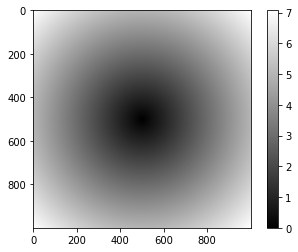

In [69]:
# np.meshgrid() - 두 개의 1차원 배열을 받아서 가능한 모든 짝을 만들 수 있는 2차원 배열 두 개를 반환
points = np.arange(-5, 5, 0.01)

xs, ys = np.meshgrid(points, points)

print(ys)
print("--------------------------------")

z = np.sqrt(xs **2 + ys **2)
print(z)
print("--------------------------------")

import matplotlib.pyplot as plt
plt.imshow(z, cmap = plt.cm.gray)
plt.colorbar()

#### 4.3.1 배열 연산으로 조건절 표현하기

In [71]:
# np.where() - if 조건절의 벡터화 버전
xarr = np.array([1.1,1.2,1.3,1.4,1.5])
yarr = np.array([2.1,2.2,2.3,2.4,2.5])
cond = np.array([True, False, True, True, False])

result = [(x if c else y) for x,y,c in zip(xarr, yarr, cond)]
print(result)
print("--------------------------------")

result = np.where(cond, xarr, yarr)
print(result)
print("--------------------------------")

[1.1, 2.2, 1.3, 1.4, 2.5]
--------------------------------
[1.1 2.2 1.3 1.4 2.5]
--------------------------------


In [73]:
arr = np.random.randn(4,4)

print(arr)
print("--------------------------------")

print(arr >0)
print("--------------------------------")

print(np.where(arr > 0, 2, -2))
print("--------------------------------")

print(np.where(arr > 0, 2, arr))
print("--------------------------------")

[[ 1.38658575  1.1397328   0.2463037  -1.04695318]
 [ 1.18516965 -0.22497247 -0.58548047 -0.90575325]
 [-0.19192205  0.3809525  -1.42424136  0.06872224]
 [ 1.59538626 -0.26795864  1.35720299 -2.11496628]]
--------------------------------
[[ True  True  True False]
 [ True False False False]
 [False  True False  True]
 [ True False  True False]]
--------------------------------
[[ 2  2  2 -2]
 [ 2 -2 -2 -2]
 [-2  2 -2  2]
 [ 2 -2  2 -2]]
--------------------------------
[[ 2.          2.          2.         -1.04695318]
 [ 2.         -0.22497247 -0.58548047 -0.90575325]
 [-0.19192205  2.         -1.42424136  2.        ]
 [ 2.         -0.26795864  2.         -2.11496628]]
--------------------------------


#### 4.3.2 수학 메서드와 통계 메서드

In [76]:
arr = np.random.randn(5,4)

print(arr)
print("--------------------------------")

print(arr.mean())
print("--------------------------------")

print(np.mean(arr))
print("--------------------------------")

print(arr.sum())
print("--------------------------------")

# axis = 1 - 모든 컬럼의 평균
print(arr.mean(axis = 1))
print("--------------------------------")

# axis = 0 - 모든 컬럼의 합
print(arr.sum(axis = 0))
print("--------------------------------")

[[ 0.6543406   1.35575314  0.94894009 -0.36601707]
 [ 2.18808696  3.11066849  0.0471504  -0.16874865]
 [-0.08176295  0.43817695 -0.75107048 -0.68862831]
 [-1.09325582 -0.53008563  1.14782082  0.44859403]
 [ 1.10152876  2.04206708 -0.7407726  -0.67241665]]
--------------------------------
0.4195184577940722
--------------------------------
0.4195184577940722
--------------------------------
8.390369155881444
--------------------------------
[ 0.64825419  1.2942893  -0.2708212  -0.00673165  0.43260164]
--------------------------------
[ 2.76893755  6.41658003  0.65206822 -1.44721665]
--------------------------------


In [77]:
arr = np.array([0,1,2,3,4,5,6,7])

# cumsum() - 중간 계산값을 담고 있는 배열 반환 : 누적합
print(arr.cumsum())
print("--------------------------------")

[ 0  1  3  6 10 15 21 28]
--------------------------------


In [78]:
arr = np.array([[0,1,2], [3,4,5], [6,7,8]])

print(arr)
print("--------------------------------")

print(arr.cumsum(axis = 0))
print("--------------------------------")

print(arr.cumprod(axis = 1))
print("--------------------------------")

[[0 1 2]
 [3 4 5]
 [6 7 8]]
--------------------------------
[[ 0  1  2]
 [ 3  5  7]
 [ 9 12 15]]
--------------------------------
[[  0   0   0]
 [  3  12  60]
 [  6  42 336]]
--------------------------------


#### - 기본 배열 통계 메서드 : sum, mean, std, var, min, max, argmin(최소 원소의 인덱스 값), argmax(최대 원소의 인덱스 값), cumsum, cumprod

#### 4.3.3 불리언 배열을 위한 메서드

In [80]:
arr = np.random.randn(100)

print((arr > 0).sum()) # 양수인 원소의 개수
print("--------------------------------")

bools = np.array([False, False, True, True])

# any() / all() - 하나 이상의 값이 True면 True / 모든 원소가 True면 True
print(bools.any())
print("--------------------------------")
print(bools.all())
print("--------------------------------")

55
--------------------------------
True
--------------------------------
False
--------------------------------


#### 4.3.4 정렬

In [82]:
# sort 메서드 - 배열을 직접 변경
arr = np.random.randn(6)

print(arr)
print("--------------------------------")

arr.sort()
print(arr)
print("--------------------------------")

[-0.23008418  0.14891154  0.64743546  0.94507127 -0.39218473  2.30557467]
--------------------------------
[-0.39218473 -0.23008418  0.14891154  0.64743546  0.94507127  2.30557467]
--------------------------------


In [83]:
arr = np.random.randn(5,3)
print(arr)
print("--------------------------------")

arr.sort(1)
print(arr)
print("--------------------------------")

[[-0.62080214 -0.6797121  -0.34655737]
 [-0.52929323  2.30210711 -0.06031248]
 [ 0.15286685 -1.14098118 -0.97065274]
 [ 1.25035248 -0.48784793 -1.64508188]
 [-0.04590166  0.76433578  1.69858079]]
--------------------------------
[[-0.6797121  -0.62080214 -0.34655737]
 [-0.52929323 -0.06031248  2.30210711]
 [-1.14098118 -0.97065274  0.15286685]
 [-1.64508188 -0.48784793  1.25035248]
 [-0.04590166  0.76433578  1.69858079]]
--------------------------------


In [84]:
# np.sort() - 배열을 직접 변경하지 않고 정렬된 결과를 가지고 있는 복사본을 반환
large_arr = np.random.randn(1000)

large_arr.sort()
print(large_arr[int(0.05 * len(large_arr))]) # 5% 분위수
print("--------------------------------")

-1.6520851309677151
--------------------------------


#### 4.3.5 집합 관련 함수

In [88]:
# np.unique() - 중복된 원소 제거 후 남은 원소 정렬된 형태로 반환
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])

print(np.unique(names))
print("--------------------------------")

ints = np.array([3,3,3,2,2,1,1,4,4])

print(np.unique(ints))
print("--------------------------------")

# np.in1d() - 두 개의 배열을 인자로 받아서 첫 번째 배열의 원소가 두 번째 배열의 원소를 포함하는지 나타내는 불리언 배열을 반환
values = np.array([6,0,0,3,2,5,6])
print(np.in1d(values, [2,3,6]))
print("--------------------------------")

['Bob' 'Joe' 'Will']
--------------------------------
[1 2 3 4]
--------------------------------
[ True False False  True  True False  True]
--------------------------------


#### - numpy 집합 함수 : unique, intersect1d, union1d, in1d, setdiff1d, setxor1d

### 4.4 배열 데이터의 파일 입출력

In [ ]:
# np.save / np.load - 배열 데이터를 저장 / 불러오기
arr = np.arange(10)
np.save('some_array', arr)

np.load('some_array.npy')

# np.savez - 여러 개의 배열을 압축된 형식으로 저장
np.savez('array_achive.npz', a = arr, b = arr)

# np.savez_compressed - 압축이 잘되는 형식 저장
np.savez_compressed('arrays_compreesed.npz', a =arr, b = arr)

### 4.5 선형대수
#### - (*)는 행렬 곱셈이 아닌 대응하는 각각의 원소의곱을 계산 / 행렬 곱셈은 배열 메서드이자 numpy 네임스페이스의 dot 함수 사용

In [94]:
x = np.array([[1,2,3], [4,5,6]])
y = np.array([[6,23], [-1,7], [8,9]])

print(x)
print("--------------------------------")

print(y)
print("--------------------------------")

print(x.dot(y))
print("--------------------------------")

# x.dot(y) = np.dot(x,y)
print(np.dot(x,y))
print("--------------------------------")

# python 3.5 이상 - @는 행렬 곱셈
print(x @ np.ones(3))
print("--------------------------------")

[[1 2 3]
 [4 5 6]]
--------------------------------
[[ 6 23]
 [-1  7]
 [ 8  9]]
--------------------------------
[[ 28  64]
 [ 67 181]]
--------------------------------
[[ 28  64]
 [ 67 181]]
--------------------------------
[ 6. 15.]
--------------------------------


In [95]:
# numpy.linalg - 행렬의 분할, 역행렬, 행렬식 등 포함
from numpy.linalg import inv, qr

X = np.random.randn(5,5)
mat = X.T.dot(X)

print(inv(mat))
print("--------------------------------")

print(mat.dot(inv(mat)))
print("--------------------------------")

q, r = qr(mat)
print(r)
print("--------------------------------")

[[11.88771762  1.57586033  1.28459704  3.54522299 -1.54211289]
 [ 1.57586033  0.31270706  0.1588584   0.47253458 -0.22279351]
 [ 1.28459704  0.1588584   0.57732762  0.63863447 -0.24478339]
 [ 3.54522299  0.47253458  0.63863447  1.69683616 -0.48708415]
 [-1.54211289 -0.22279351 -0.24478339 -0.48708415  0.3918333 ]]
--------------------------------
[[ 1.00000000e+00 -6.93889390e-17 -1.11022302e-16 -3.33066907e-16
   1.11022302e-16]
 [ 2.22044605e-16  1.00000000e+00  1.11022302e-16  4.44089210e-16
   0.00000000e+00]
 [-8.88178420e-16  0.00000000e+00  1.00000000e+00  4.44089210e-16
   5.55111512e-17]
 [ 2.77555756e-15  2.42861287e-16  9.71445147e-17  1.00000000e+00
  -4.44089210e-16]
 [-1.77635684e-15  2.22044605e-16  4.44089210e-16  0.00000000e+00
   1.00000000e+00]]
--------------------------------
[[-1.43656055  7.80112731 -0.62800953  0.81627665 -1.55039736]
 [ 0.         -6.36065123 -2.25429978  1.50697947 -4.7881498 ]
 [ 0.          0.         -2.88763984  1.08539158 -0.0290931 ]
 [ 

#### - numpy.linalg 함수 : diag(정사각 행렬의 대각 원소를 1차원 배열로 반환), dot(행렬 곱), trace(대각 원소 합), det(행렬식), eig(고유값, 고유벡트), inv(역행렬), pinv(무어-펜로즈 유사역원 역행렬), qr(QR붆), svd(특이값 분해), solve(A가 정사각 행렬일 때 Ax = b를 만족하는 x), lstsq(Ax = b를 만족하는 최소제곱해)

### 4.6 난수 생성

In [97]:
# 표준정규분포 표본
samples = np.random.normal(size = (4,4))
print(samples)
print("--------------------------------")

# np.random.seed() - seed값 설정
np.random.seed(1234)

# np.random.RandomState() - 다른 난수 생성기로부터 격리된 난수 생성기
rng = np.random.RandomState(1234)
print(rng.randn(10))
print("--------------------------------")

[[-2.10606048  0.16809282 -2.69272064 -0.70877201]
 [ 1.08533039 -0.29197929  0.11723325  0.03717139]
 [-0.25415096 -0.71765163  1.74007434  0.17984005]
 [ 0.1715137   1.27882453  0.68532332  1.05263514]]
--------------------------------
[ 0.47143516 -1.19097569  1.43270697 -0.3126519  -0.72058873  0.88716294
  0.85958841 -0.6365235   0.01569637 -2.24268495]
--------------------------------


#### - numpy.random 함수 : seed, permutation(순서를 임의로 바꾸거나 임의의 순열을 반환), shuffle(리스트나 배열의 순서를 뒤섞는다), rand(균등분포에서 표본 추출), randint(주어진 최대/최소 범위 안에서 임의의 난수 추출), randn(표준정규분포에서 추출), binomial(이항분포 추출), noraml(정규분포 추출), beta(베타분포 추출), chisqure(카이제곱분포 추출), gamma(감마분포 추출), uniform(r균등 [0,1)분포에서 추출)